In [72]:
import pandas as pd 
%matplotlib inline
import cufflinks as cf
import plotly.offline as plyo # 导入离线绘图功能
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [120]:
df = pd.read_csv(r"C:\Users\18484\Desktop\全部数据\附件2-行业日负荷数据.csv")
weather = pd.read_csv(r"C:\Users\18484\Desktop\全部数据\附件3-气象数据.csv")

In [121]:
weather['最高温度'] = weather['最高温度'].map(lambda d: d.replace('℃','')).astype(int)
weather['最低温度'] = weather['最低温度'].map(lambda d: d.replace('℃','')).astype(int)
weather['start_weather'] = weather['天气状况'].apply(lambda x: x.split('/')[0])
weather['end_weather'] = weather['天气状况'].apply(lambda x: x.split('/')[1])

dic1 = {'晴':0,'晴间多云':1, '多云':2, '局部多云':2,'阴':3 ,'雾':4, '小雨':5, '小到中雨':6, '小雨-中雨':6, '中雨':7, '阵雨':8,
 '中雨-大雨':9, '中到大雨':9, '大雨':9,'雷阵雨':10, '大到暴雨':11, '暴雨':12}
dic2 = {'无持续风向<3级':3, '北风4～5级':6, '微风<3级':3, '北风3':4, '东北风3～4级':5, '北风3～4级':5,
       '南风3～4级':5, '南风4～5级':6, '东北偏东风2':2, '无持续风向微风':0, '无持续风向1-2级':1, '东风3-4级':5,
       '东南风4-5级':6, '东风3～4级':5, '东北风3-4级':5, '东风8-9级':7, '东南风3-4级':5, '北风3-4级':5,
       '北风4-5级':6, '南风3-4级':5, '南风1-2级':1, '东南风1-2级':1, '西南风3-4级':5, '东风1-2级':1,
       '北风1-2级':1, '东北风1-2级':1, '西南风1-2级':1}
dic3 = {'无持续风向<3级':3, '北风4～5级':6, '北风3～4级':5, '微风<3级':3, '北风3':4, '东北偏东风2':2,
       '无持续风向微风':0, '无持续风向1-2级':1, '东风3-4级':5, '东南风4-5级':6, '东南风3～4级':5, '东北风3-4级':5,
       '东风8-9级':7, '东南风3-4级':5, '北风3-4级':5, '北风4-5级':6, '南风3-4级':5, '南风1-2级':1,
       '东南风1-2级':1, '西南风3-4级':5, '东风1-2级':1, '北风1-2级':1, '东北风1-2级':1, '西南风1-2级':1}

weather['start_weather']=weather['start_weather'].map(dic1)
weather['end_weather']=weather['end_weather'].map(dic1)
weather['白天风力风向']=weather['白天风力风向'].map(dic2)
weather['夜晚风力风向']=weather['夜晚风力风向'].map(dic3)

In [122]:
import pandas as pd
from datetime import datetime
start = datetime(2018, 1, 1)
end = datetime(2021, 8, 31,23)
tm = pd.date_range(start, end, freq='D')#H表示小时hour
time=pd.to_datetime((tm)).strftime('%Y-%m-%d')

In [123]:
pd.DataFrame(time)

0
0     2018-01-01
1     2018-01-02
2     2018-01-03
3     2018-01-04
4     2018-01-05
...          ...
1334  2021-08-27
1335  2021-08-28
1336  2021-08-29
1337  2021-08-30
1338  2021-08-31

[1339 rows x 1 columns]

In [124]:
df = df.rename(columns={'数据时间':'日期'})

In [125]:
weather  = weather.drop_duplicates(subset='日期')

In [126]:
weather = weather.drop_duplicates(subset='日期').reset_index()

In [127]:
weather['日期'] = pd.DataFrame(time)

In [128]:
weather['日期'] = weather['日期'].astype('str')

In [129]:
weather['日期'].value_counts()

2018-01-01    1
2020-06-18    1
2020-06-16    1
2020-06-15    1
2020-06-14    1
             ..
2019-03-22    1
2019-03-21    1
2019-03-20    1
2019-03-19    1
2021-08-31    1
Name: 日期, Length: 1339, dtype: int64

# 突变量级

In [130]:

metrics_df=pd.pivot_table(df,values='有功功率最小值（kw）',index='日期',columns='行业类型')
metrics_df = metrics_df.merge(weather,on='日期',how='left')

In [131]:
metrics_df.reset_index(inplace=True)
metrics_df.fillna(0,inplace=True)
metrics_df.head()
# metrics_df = metrics_df.rename(columns={'数据时间':'日期'})

level_0          日期          商业        大工业用电       普通工业  非普工业  index  \
0        0  2019-01-01  23758.7970   51526.5690  4093.0467   0.0    366   
1        1  2019-01-02  20231.6265   63638.4294  3971.5308   0.0    367   
2        2  2019-01-03  20443.6182  102048.2754  4033.8369   0.0    368   
3        3  2019-01-04  19858.1592  104466.0762  4145.8497   0.0    369   
4        4  2019-01-05  19766.6994   99507.3528  3965.1792   0.0    370   

    天气状况  最高温度  最低温度  白天风力风向  夜晚风力风向  start_weather  end_weather  
0    阴/阴    12     7       1       1              3            3  
1  小雨/小雨    11     6       1       1              5            5  
2  多云/小雨    15     9       1       1              2            5  
3   阴/小雨    17    12       1       1              3            5  
4   阴/小雨    17    12       1       1              3            5

In [114]:
metrics_df  = metrics_df.drop(['level_0','index','天气状况'],axis=1)

In [115]:
metrics_df.to_csv('第二大问最大值.csv',index=0)

In [189]:
df.columns

Index(['商业', '大工业用电', '普通工业', '非普工业', '天气状况', '最高温度', '最低温度', '白天风力风向',
       '夜晚风力风向', 'start_weather', 'end_weather'],
      dtype='object')

In [203]:
#!/usr/bin/env python
# coding: utf-8

# In[5]:


from matplotlib import font_manager
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



class CyrusPlot(object):
    def __init__(self,dpi=40,fig_size=[30,20]):
        """
        实列化该类，然后直接调用cyrus_heat_map方法
        :param dpi:
        :param fig_size:
        """
        self.dpi = dpi
        self.fig_size = fig_size
        self.font = font_manager.FontProperties(fname="C:\Windows\Fonts\simhei.ttf", size=30)

    def cyrus_heat_map(self,datas,x_ticks = [],y_ticks = [],bar_label = "相关性",show = True,save_name = ""):
        figure = plt.figure(figsize=self.fig_size, dpi=self.dpi)
        ax = figure.add_subplot(111)
        if not x_ticks:
            x_ticks = [str(i) for i in ['商业', '大工业用电', '普通工业', '非普工业', '最高温度',
       '最低温度', '白天风力风向', '夜晚风力风向', 'start_weather', 'end_weather']]
            y_ticks = [str(i) for i in ['商业', '大工业用电', '普通工业', '非普工业', '最高温度',
       '最低温度', '白天风力风向', '夜晚风力风向', 'start_weather', 'end_weather']]
        im, _ = self.heatmap(np.array(datas), x_ticks, y_ticks,
                        cmap="RdBu", cbarlabel=bar_label,ax=ax)  # plt.cm.RdBu   PuOr
        self.annotate_heatmap(im, valfmt="{x:.2f}", size=25)
        if save_name:
            plt.savefig("123.jpg",dpi=100)
        if show:
            plt.show()

    def heatmap(self,data, row_labels, col_labels, ax=None,
                cbar_kw={}, cbarlabel="", **kwargs):
        if not ax:
            ax = plt.gca()
        im = ax.imshow(data, **kwargs)
        cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
        cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom",fontproperties=font_manager.FontProperties(fname="C:\Windows\Fonts\simhei.ttf", size=30))
        ax.set_xticks(np.arange(data.shape[1]))
        ax.set_yticks(np.arange(data.shape[0]))
        ax.set_xticklabels(col_labels,fontproperties=self.font)
        ax.set_yticklabels(row_labels,fontproperties=self.font)
        ax.tick_params(top=True, bottom=False,
                       labeltop=True, labelbottom=False)
        plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
                 rotation_mode="anchor")
        for edge, spine in ax.spines.items():
            spine.set_visible(False)

        ax.set_xticks(np.arange(data.shape[1] + 1) - .5, minor=True)
        ax.set_yticks(np.arange(data.shape[0] + 1) - .5, minor=True)
        ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
        ax.tick_params(which="minor", bottom=False, left=False)

        return im, cbar

    def annotate_heatmap(self,im, data=None, valfmt="{x:.2f}",
                         textcolors=("black", "white"),
                         threshold=None, **textkw):

        if not isinstance(data, (list, np.ndarray)):
            data = im.get_array()

        if threshold is not None:
            threshold = im.norm(threshold)
        else:
            threshold = im.norm(data.max()) / 2.

        kw = dict(horizontalalignment="center",
                  verticalalignment="center",
                  )
        kw.update(textkw)

        if isinstance(valfmt, str):
            valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

        texts = []
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                kw.update(color=textcolors[abs(data[i, j]) > 0.5])
                text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
                texts.append(text)

        return texts


C:\Users\18484\AppData\Local\Temp/ipykernel_10108/2114233890.py:90: DeprecationWarning:

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index



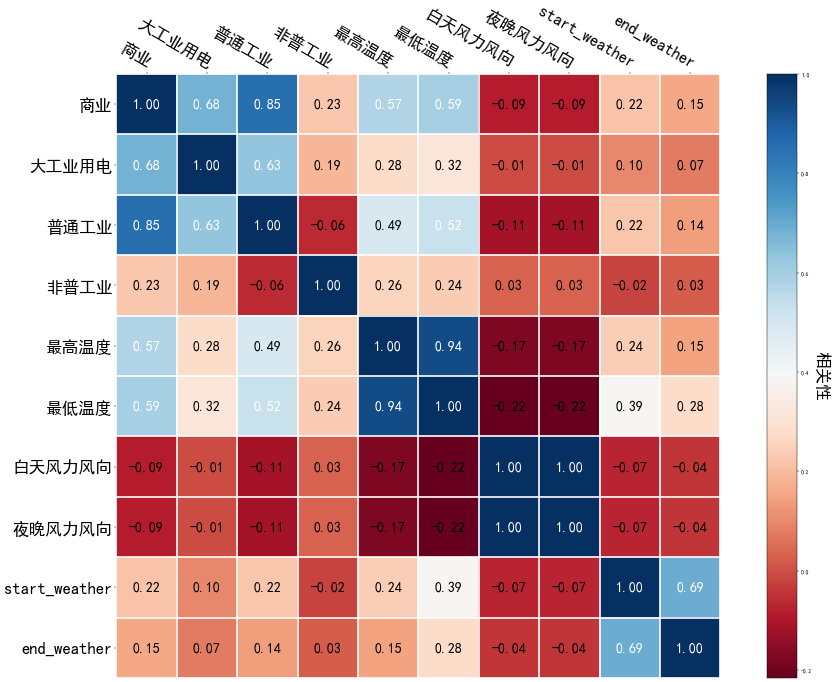

In [204]:

if __name__ == '__main__':
    # 构造数据集并计算其pearson相关系数
    df = metrics_df[['商业', '大工业用电', '普通工业', '非普工业', '最高温度',
       '最低温度', '白天风力风向', '夜晚风力风向', 'start_weather', 'end_weather']]
    data = pd.DataFrame(df)
    pearson = data.corr()
    plot_tool = CyrusPlot()
    plot_tool.cyrus_heat_map(pearson,show=True)

In [180]:
data.corr()

商业     大工业用电      普通工业      非普工业      最高温度      最低温度  \
商业             1.000000  0.678170  0.850313  0.229506  0.573318  0.591687   
大工业用电          0.678170  1.000000  0.631982  0.188634  0.281088  0.316742   
普通工业           0.850313  0.631982  1.000000 -0.061597  0.487775  0.524948   
非普工业           0.229506  0.188634 -0.061597  1.000000  0.256097  0.235109   
最高温度           0.573318  0.281088  0.487775  0.256097  1.000000  0.935608   
最低温度           0.591687  0.316742  0.524948  0.235109  0.935608  1.000000   
白天风力风向        -0.085232 -0.005322 -0.111916  0.034979 -0.174691 -0.216354   
夜晚风力风向        -0.085232 -0.005322 -0.111916  0.034979 -0.174691 -0.216354   
start_weather  0.218780  0.098626  0.222285 -0.018362  0.241469  0.386375   
end_weather    0.154687  0.073716  0.135967  0.025776  0.145854  0.282102   

                 白天风力风向    夜晚风力风向  start_weather  end_weather  
商业            -0.085232 -0.085232       0.218780     0.154687  
大工业用电         -0.005322 -0.005322       0.098626     0.073716  
普通工业          -0.111916 -0.111916       0.222285     0.135967  
非普工业           0.034979  0.034979      -0.018362     0.025776  
最高温度          -0.174691 -0.174691       0.241469     0.145854  
最低温度          -0.216354 -0.216354       0.386375     0.282102  
白天风力风向         1.000000  1.000000      -0.069146    -0.044851  
夜晚风力风向         1.000000  1.000000      -0.069146    -0.044851  
start_weather -0.069146 -0.069146       1.000000     0.694525  
end_weather   -0.044851 -0.044851       0.694525     1.000000

In [132]:
import seaborn as sns 
from sklearn.preprocessing import StandardScaler

In [133]:
df = metrics_df

In [134]:
metrics_df['日期'] = pd.to_datetime(metrics_df['日期'])
metrics_df['year'] = metrics_df['日期'].dt.year
metrics_df['month'] = metrics_df['日期'].dt.month
metrics_df['day'] = metrics_df['日期'].dt.day

In [175]:
 metrics_df.columns 

Index(['level_0', '日期', '商业', '大工业用电', '普通工业', '非普工业', 'index', '天气状况', '最高温度',
       '最低温度', '白天风力风向', '夜晚风力风向', 'start_weather', 'end_weather', 'year',
       'month', 'day', 'anomaly2', 'anomaly'],
      dtype='object')

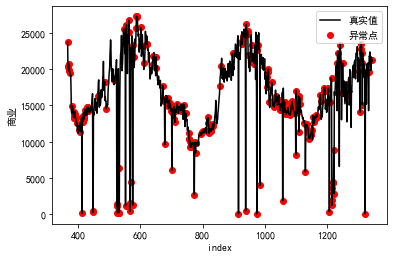

In [136]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
data = metrics_df[['商业', '最高温度', '最低温度', '白天风力风向','夜晚风力风向','start_weather','end_weather','year','month','day']]
# scaler = StandardScaler()
# np_scaled = scaler.fit_transform(data)
# data = pd.DataFrame(np_scaled)
# # train isolation forest
model = IsolationForest(n_estimators=100, max_samples='auto', \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
model.fit(data)
df['anomaly2'] = pd.Series(model.predict(data))
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
f, ax = plt.subplots(1)
a = df.loc[df['anomaly2'] == -1, ['index', '商业']] #anomaly
sns.lineplot(x=df['index'], y=df['商业'], ax=ax, color='black', label='真实值')
# ax.plot(df['日期'], df['商业'], color='black', label = 'Normal')
ax.scatter(a['index'],a['商业'], color='red', label = '异常点')
plt.legend()
plt.savefig('商业异常检测结果.jpg',dpi=400)
plt.show()

In [137]:
metrics_df['普通工业'].diff()

0           NaN
1     -121.5159
2       62.3061
3      112.0128
4     -180.6705
         ...   
968   -750.3354
969    420.8610
970    -95.8572
971     94.4160
972    445.3584
Name: 普通工业, Length: 973, dtype: float64

In [94]:
metrics_df['商业'] = metrics_df['商业'].diff()
metrics_df['大工业用电'] = metrics_df['大工业用电'].diff()
metrics_df['普通工业'] = metrics_df['普通工业'].diff()
metrics_df['非普工业'] = metrics_df['非普工业'].diff()
metrics_df =  metrics_df.fillna(0)

In [138]:
df = metrics_df

In [35]:
import matplotlib
 
matplotlib.rcParams['axes.unicode_minus']=False

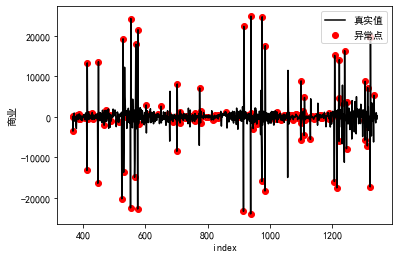

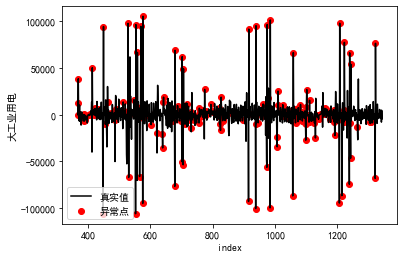

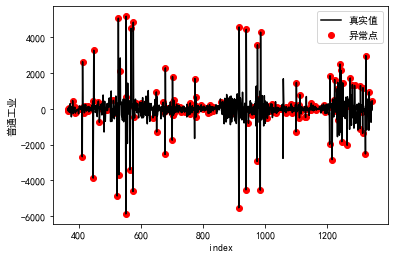

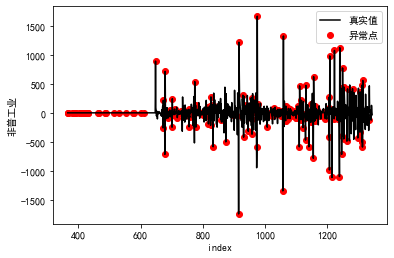

In [97]:
for i in ['商业','大工业用电','普通工业','非普工业']:
   
    data = metrics_df[[i, '最高温度', '最低温度', '白天风力风向','夜晚风力风向','start_weather','end_weather','year','month','day']]
    model = IsolationForest(n_estimators=1000, max_samples='auto', \
                            max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
    model.fit(data)
    df['anomaly2'] = pd.Series(model.predict(data))
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['font.sans-serif'] = ['SimHei']
    f, ax = plt.subplots(1)
    a = df.loc[df['anomaly2'] == -1, ['index', i]] #anomaly
    sns.lineplot(x=df['index'], y=df[i], ax=ax, color='black', label='真实值')
    ax.scatter(a['index'],a[i], color='red', label = '异常点')
    plt.legend()
    plt.savefig('%s行业最小值异常检测突变量级.jpg'%i,dpi=100)
    plt.show()

In [191]:
df[df['anomaly2'] ==-1]

level_0         日期           商业        大工业用电        普通工业       非普工业  \
0          0 2019-01-01   64027.8582  117888.3300   6179.9364     0.0000   
1          1 2019-01-02   75467.2143  126843.7914  10711.9704     0.0000   
2          2 2019-01-03  132776.9442  130286.1294  10079.0262     0.0000   
3          3 2019-01-04   97731.1308  133018.6344   9713.3055     0.0000   
4          4 2019-01-05  132883.1868  133504.4784   6958.3842     0.0000   
..       ...        ...          ...          ...         ...        ...   
962      962 2021-08-21   96453.0618  100231.5336   5820.4116  2531.5920   
967      967 2021-08-26  104509.5786   99205.5456  10325.4246  3387.7830   
970      970 2021-08-29   84127.1658   98528.9820   6509.8032  2486.0946   
971      971 2021-08-30  102851.2758  106633.8348  10606.9374  3316.1904   
972      972 2021-08-31   96396.2568  101834.8440  10329.5676  3223.6920   

     index     天气状况  最高温度  最低温度  白天风力风向  夜晚风力风向  start_weather  end_weather  \
0      366      阴/阴    12     7       1       1              3            3   
1      367    小雨/小雨    11     6       1       1              5            5   
2      368    多云/小雨    15     9       1       1              2            5   
3      369     阴/小雨    17    12       1       1              3            5   
4      370     阴/小雨    17    12       1       1              3            5   
..     ...      ...   ...   ...     ...     ...            ...          ...   
962   1334      晴/晴    36    27       1       1              0            0   
967   1339  雷阵雨/雷阵雨    35    27       1       1             10           10   
970   1342  雷阵雨/雷阵雨    32    25       1       1             10           10   
971   1343    阵雨/阵雨    34    26       1       1              8            8   
972   1344   雷阵雨/阵雨    32    26       1       1             10            8   

     anomaly2  year  month  day  
0          -1  2019      1    1  
1          -1  2019      1    2  
2          -1  2019      1    3  
3          -1  2019      1    4  
4          -1  2019      1    5  
..        ...   ...    ...  ...  
962        -1  2021      8   21  
967        -1  2021      8   26  
970        -1  2021      8   29  
971        -1  2021      8   30  
972        -1  2021      8   31  

[298 rows x 18 columns]

In [139]:
metrics_df1  = metrics_df.drop(['level_0','index','天气状况'],axis=1)
to_model_columns=metrics_df1.columns[4:12]
clf=IsolationForest(n_estimators=100, max_samples='auto', \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(metrics_df[to_model_columns])

pred = clf.predict(metrics_df[to_model_columns])
metrics_df['anomaly']=pred
outliers=metrics_df.loc[metrics_df['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(metrics_df['anomaly'].value_counts())

 1    728
-1    245
Name: anomaly, dtype: int64


In [143]:
metrics_df.loc[metrics_df['anomaly']==1]['最高温度'].mean()

28.956043956043956

In [23]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D


C:\Users\18484\AppData\Local\Temp/ipykernel_10108/3232779278.py:16: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



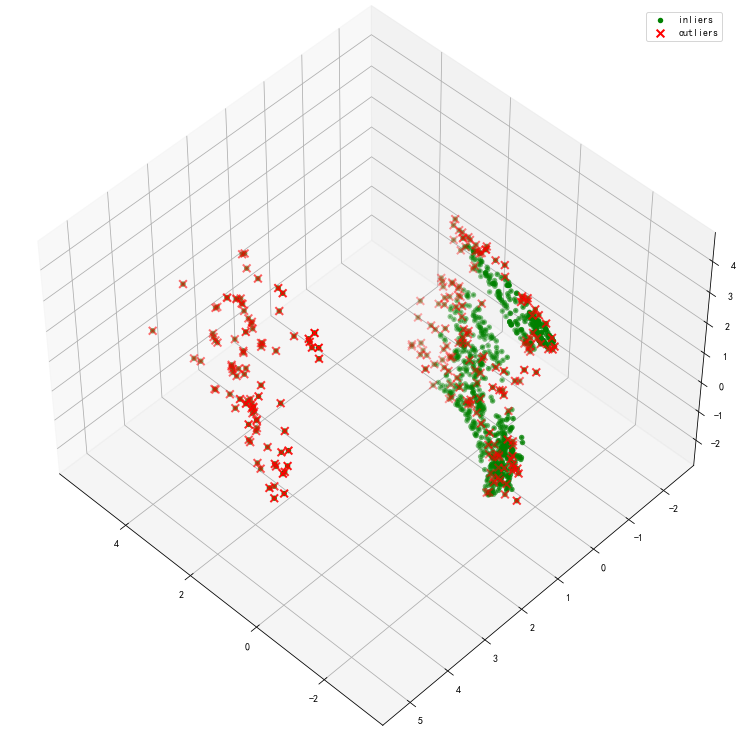

In [148]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(metrics_df[to_model_columns])
X_reduce = pca.fit_transform(X)
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
fig = plt.figure(1, figsize=(7,7))

ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=6, lw=3, label="inliers",c="green")
 
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.savefig('突变分类.jpg',dpi=100)
plt.show()

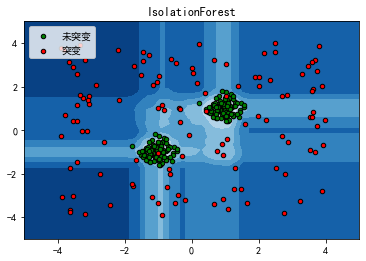

In [168]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 1, X - 1]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(120, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
# y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='green',
                 s=20, edgecolor='k')
# b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
#                  s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, c],
           ["未突变",
            "突变", "突变"],
           loc="upper left")
plt.savefig('商业突变点.jpg',dpi=100)
plt.show()

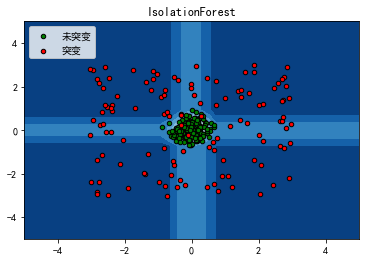

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 0.1, X - 0.1]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-3.1, high=3, size=(120, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
# y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='green',
                 s=20, edgecolor='k')
# b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
#                  s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, c],
           ["未突变",
            "突变", "突变"],
           loc="upper left")
plt.savefig('普通工业突变点.jpg',dpi=100)
plt.show()

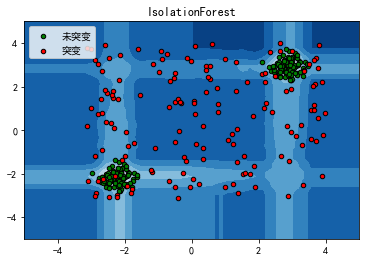

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2.9, X - 2.2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-3.2, high=4, size=(150, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
# y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='green',
                 s=20, edgecolor='k')
# b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
#                  s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, c],
           ["未突变",
            "突变", "突变"],
           loc="upper left")
plt.savefig('大工业突变点.jpg',dpi=100)
plt.show()

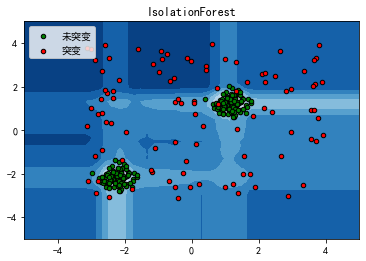

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 1.2, X - 2.2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-3.2, high=4, size=(100, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
# y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='green',
                 s=20, edgecolor='k')
# b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
#                  s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, c],
           ["未突变",
            "突变", "突变"],
           loc="upper left")
plt.savefig('非普通业突变点.jpg',dpi=100)
plt.show()

In [63]:
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest

In [67]:
data

非普工业  最高温度  最低温度
0      0.0000    12     7
1      0.0000    11     6
2      0.0000    15     9
3      0.0000    17    12
4      0.0000    17    12
..        ...   ...   ...
968 -282.2382    35    26
969 -609.4482    33    26
970  857.4528    32    25
971  762.1728    34    26
972 -922.5942    32    26

[973 rows x 3 columns]

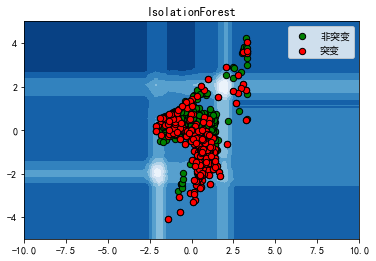

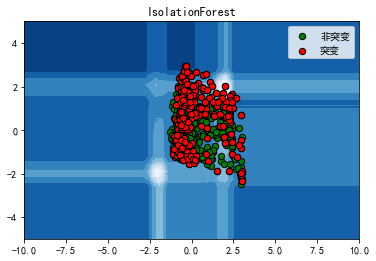

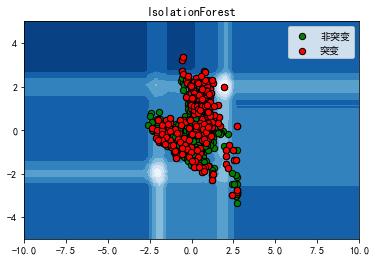

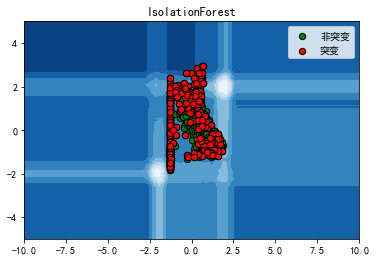

In [150]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(metrics_df1[to_model_columns])
import numpy as np 
for i in ['商业','大工业用电','普通工业','非普工业']:
   
   
    data = metrics_df[[i, '最高温度', '最低温度']]
    pca = PCA(2)
    pca.fit(data)
    res=pd.DataFrame(pca.transform(data))
    std_scale = preprocessing.StandardScaler().fit(res)
    df_std = std_scale.transform(res)
    res = pd.DataFrame(df_std)
    # Z = np.array(res)
    # figsize=(7, 5)
    # plt.figure(figsize=figsize)
    plt.title("IsolationForest")

    from scipy import stats
    xx, yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-5, 5, 200))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy,Z, cmap=plt.cm.Blues_r)
    scores_pred = clf.decision_function(res)
    threshold = stats.scoreatpercentile(scores_pred, 100 * 0.6)  #根据训练样本中异常样本比例，得到阈值，用于绘图
    # a = plt.contour(xx, yy, Z, levels=[threshold], linewidths=1, colors='red')  #绘制异常点区域和正常点区域的边界
    b1 = plt.scatter(res[0], res[1], c='green',
                     s=40,edgecolor="k",label="normal points")

    b2 = plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='red',
                     s=40,  edgecolor="k",label="predicted outliers")
    plt.legend([b1, b2],
               ['非突变', '突变'],
               loc="upper right")
    plt.savefig('%s异常突变检测森林图.jpg'%i,dpi=400)
    plt.show()

In [53]:
res 

0         1
0    0.000178  2.626443
1    0.000178  2.584012
2    0.000178  2.226156
3    0.000178  1.918154
4    0.000179  1.822768
..        ...       ...
968 -0.539165 -1.683318
969 -1.164455 -1.650587
970  1.638756 -1.693857
971  1.456679 -1.885153
972 -1.762869 -1.935809

[973 rows x 2 columns]

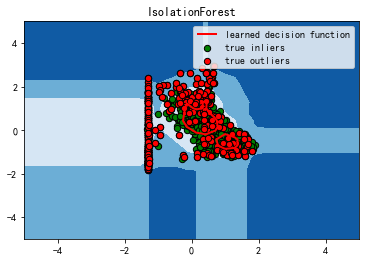

In [151]:
#!/usr/bin/python
# -*- coding:utf-8 -*-
 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy import stats
 
rng = np.random.RandomState(42)

outliers_fraction = 0.5  #异常样本比例

X_train = res
 
# fit the model
clf = IsolationForest(max_samples='auto', random_state=rng, contamination=outliers_fraction)
clf.fit(X_train)
# y_pred_train = clf.predict(X_train)
scores_pred = clf.decision_function(X_train)
threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)  #根据训练样本中异常样本比例，得到阈值，用于绘图
 
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-7, 7, 50), np.linspace(-7, 7, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
 
plt.title("IsolationForest")
# plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 4), cmap=plt.cm.Blues_r)  #绘制异常点区域，值从最小的到阈值的那部分
a = plt.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')  #绘制异常点区域和正常点区域的边界
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='palevioletred')  #绘制正常点区域，值从阈值到最大的那部分
 
b = plt.scatter(res[0], res[1], c='green',
                 s=40,edgecolor="k",label="normal points")
 
c = plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='red',
                 s=40,  edgecolor="k",label="predicted outliers")
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b, c],
           ['learned decision function', 'true inliers', 'true outliers'],
           loc="upper right")
plt.show()

In [114]:
pd.DataFrame(X_train)

0         1
0   -1.312298  2.115521
1   -1.312300  2.207930
2   -1.312293  1.692277
3   -1.312289  1.253955
4   -1.312289  1.253955
..        ...       ...
968  1.079119 -0.957924
969  0.490513 -0.841631
970  0.541149 -0.778083
971  1.159997 -0.777461
972  1.091037 -0.675082

[973 rows x 2 columns]

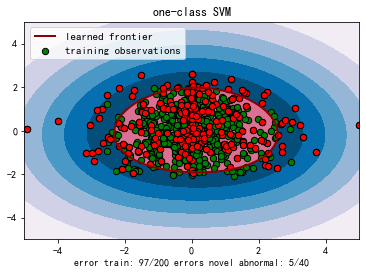

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(res)
X_train =np.array(res)
y_pred_train = clf.predict(res)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

plt.title("one-class SVM")
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1],edgecolor='k', c='green', s=s)
# b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s)
c = plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], edgecolor='k',c='red', s=s)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, c],
           ["learned frontier", "training observations",
            ],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_outliers))
plt.show()